# Global Carbon Budget: Fossil Fuel and Cement Production

In [1]:
%matplotlib inline

In [2]:
import math

import matplotlib.pyplot as plt
plt.rcParams.update({'mathtext.default':  'regular'})
plt.style.use("ggplot")

from pandas_datapackage_reader import read_datapackage

Let's load the global fossil fuel and cement production emissions data from the [Global Carbon Budget](http://www.globalcarbonproject.org/carbonbudget/index.htm). It has been pre-processed for easy reading in as a [data package](https://github.com/openclimatedata/global-carbon-budget).

In [3]:
ffc = read_datapackage("https://github.com/openclimatedata/global-carbon-budget",
                       "fossil-fuel-cement")

In [4]:
ffc.head()

,Category,Value,Source
Year,,,
1959,Total,2454.0,CDIAC
1960,Total,2569.0,CDIAC
1961,Total,2580.0,CDIAC
1962,Total,2686.0,CDIAC
1963,Total,2833.0,CDIAC


Turn it into a wide table, with one variable per column.

In [5]:
ffc = ffc.pivot(columns="Category", values="Value")
ffc.head()

Category,Cement,Coal,Flaring,Gas,Oil,Per Capita,Total
Year,,,,,,,
1959,40.0,1382.0,36.0,206.0,789.0,0.83,2454.0
1960,43.0,1410.0,39.0,227.0,849.0,0.85,2569.0
1961,45.0,1349.0,42.0,240.0,904.0,0.84,2580.0
1962,49.0,1351.0,44.0,263.0,980.0,0.86,2686.0
1963,51.0,1396.0,47.0,286.0,1052.0,0.89,2833.0


Conversion to Gt and to tonnes CO$_2$ instead of tonnes C.

In [6]:
ffc_Gt_CO2 = ffc[["Total", "Coal", "Oil", "Gas", "Cement", "Flaring"]] * 3.664 / 1000

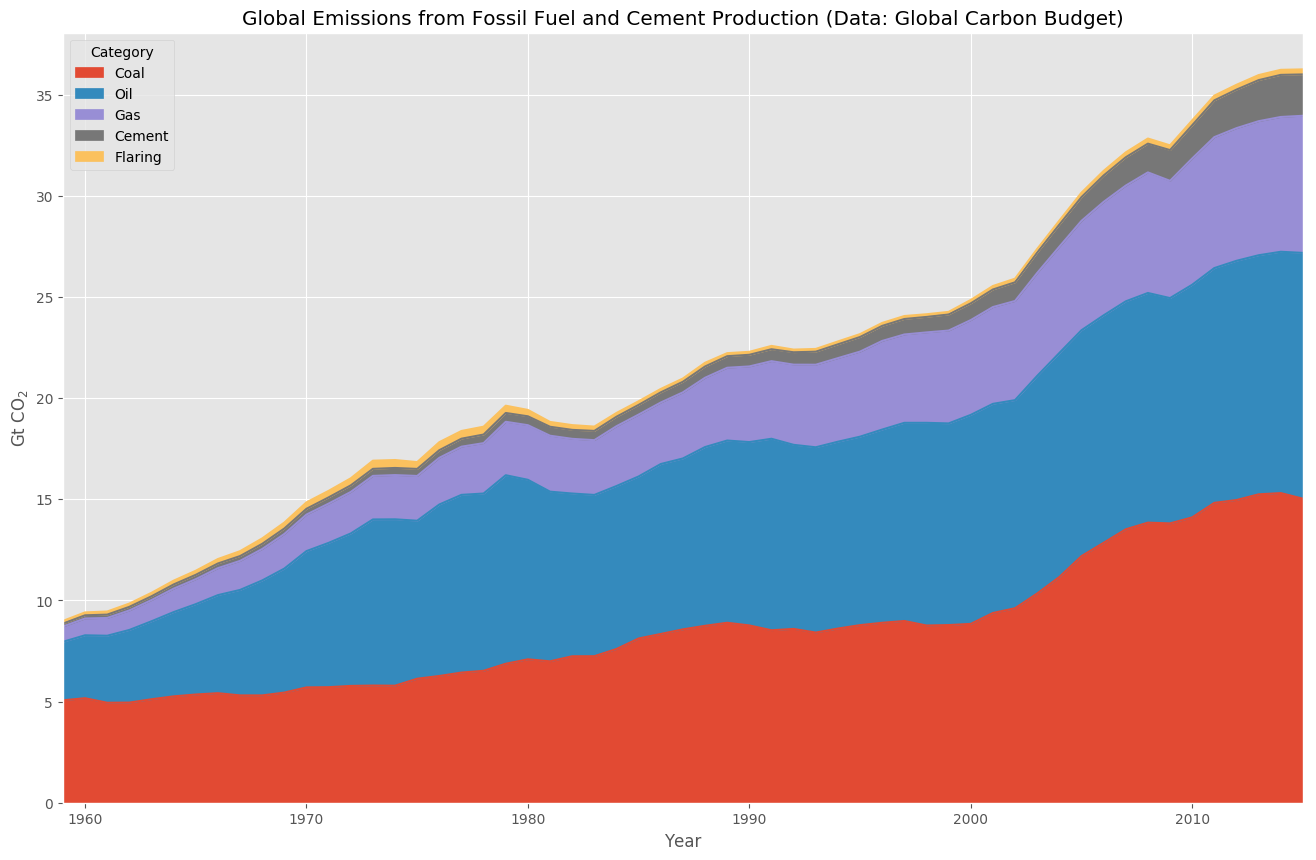

In [7]:
ffc_Gt_CO2[["Coal", "Oil", "Gas", "Cement", "Flaring"]].plot.area(stacked=True)
plt.title("Global Emissions from Fossil Fuel and Cement Production (Data: Global Carbon Budget)")
plt.ylabel("Gt CO$_2$");

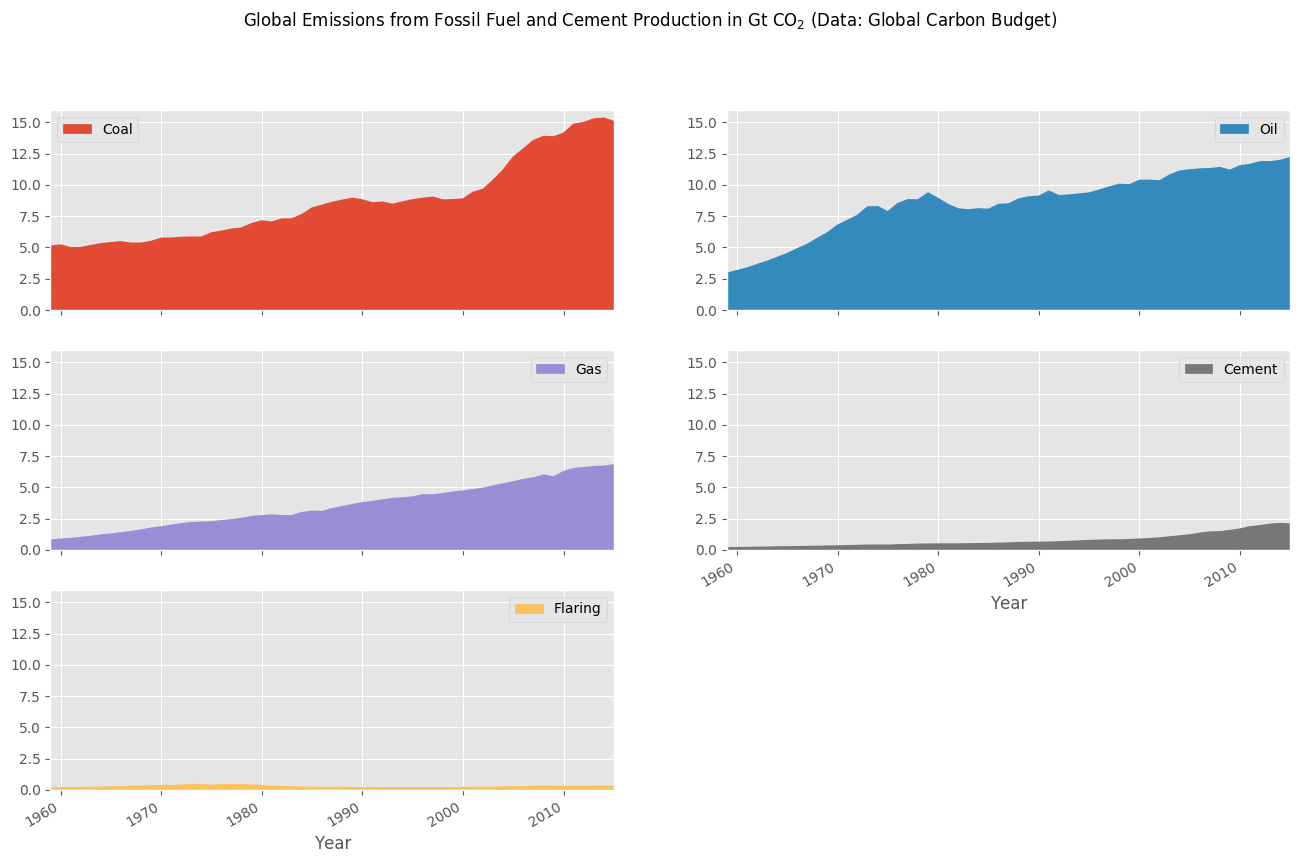

In [8]:
subcategories = ffc_Gt_CO2[["Coal", "Oil", "Gas", "Cement", "Flaring"]] 
ymax = math.ceil(subcategories.max(axis=1).max())
axes = subcategories.plot.area(subplots=True, layout=(3,2), ylim=(0, ymax))
plt.suptitle("Global Emissions from Fossil Fuel and Cement Production in Gt CO$_2$ (Data: Global Carbon Budget)");

## Per-capita emissions

Per-Capita emissions are included in the dataset. We convert to t CO$_2$ per person per year.

In [9]:
per_capita_CO2 = ffc["Per Capita"] * 3.664

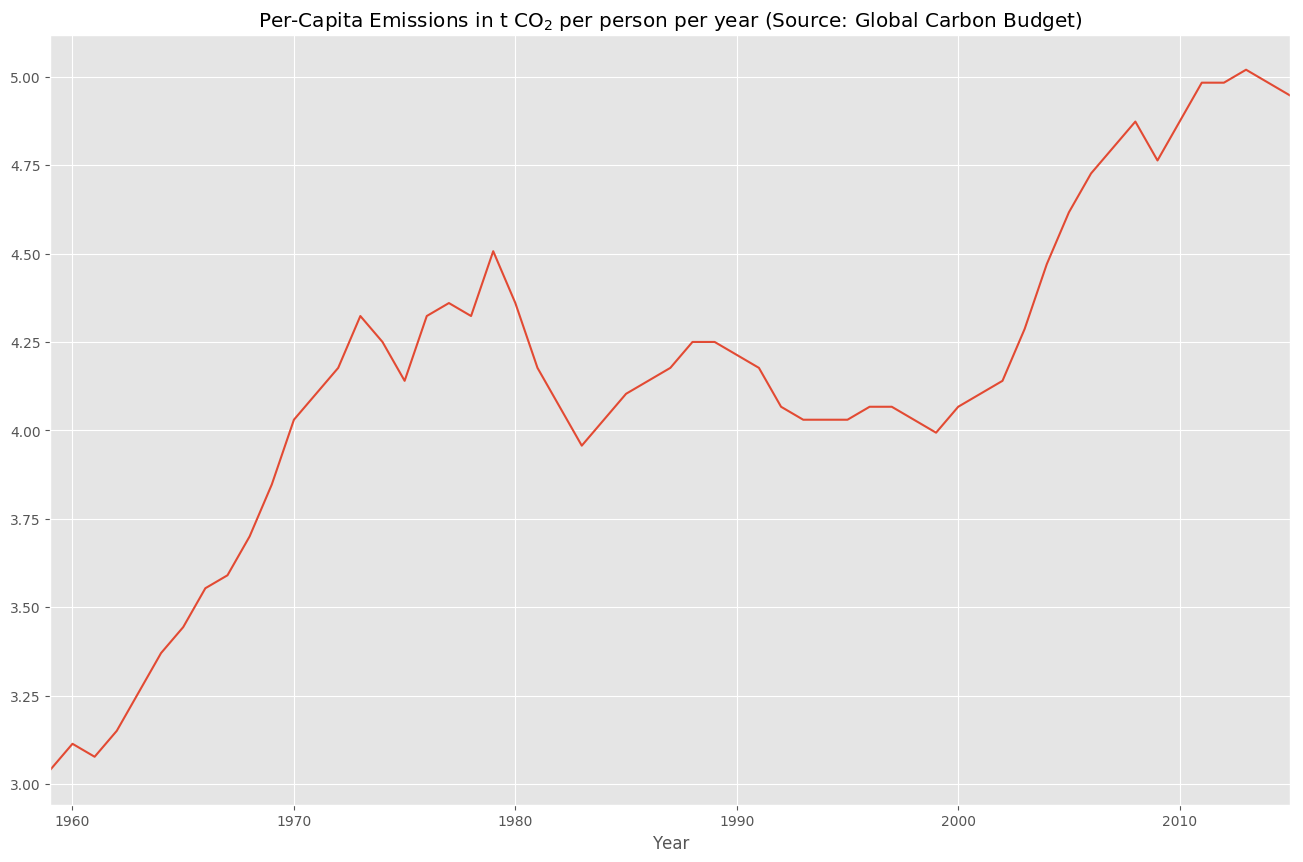

In [10]:
per_capita_CO2.plot()
plt.title("Per-Capita Emissions in t CO$_2$ per person per year (Source: Global Carbon Budget)");

Let's pull in a [population data package](https://github.com/datasets/population) to have a look at the population growth.

In [11]:
population = read_datapackage("https://github.com/datasets/population")

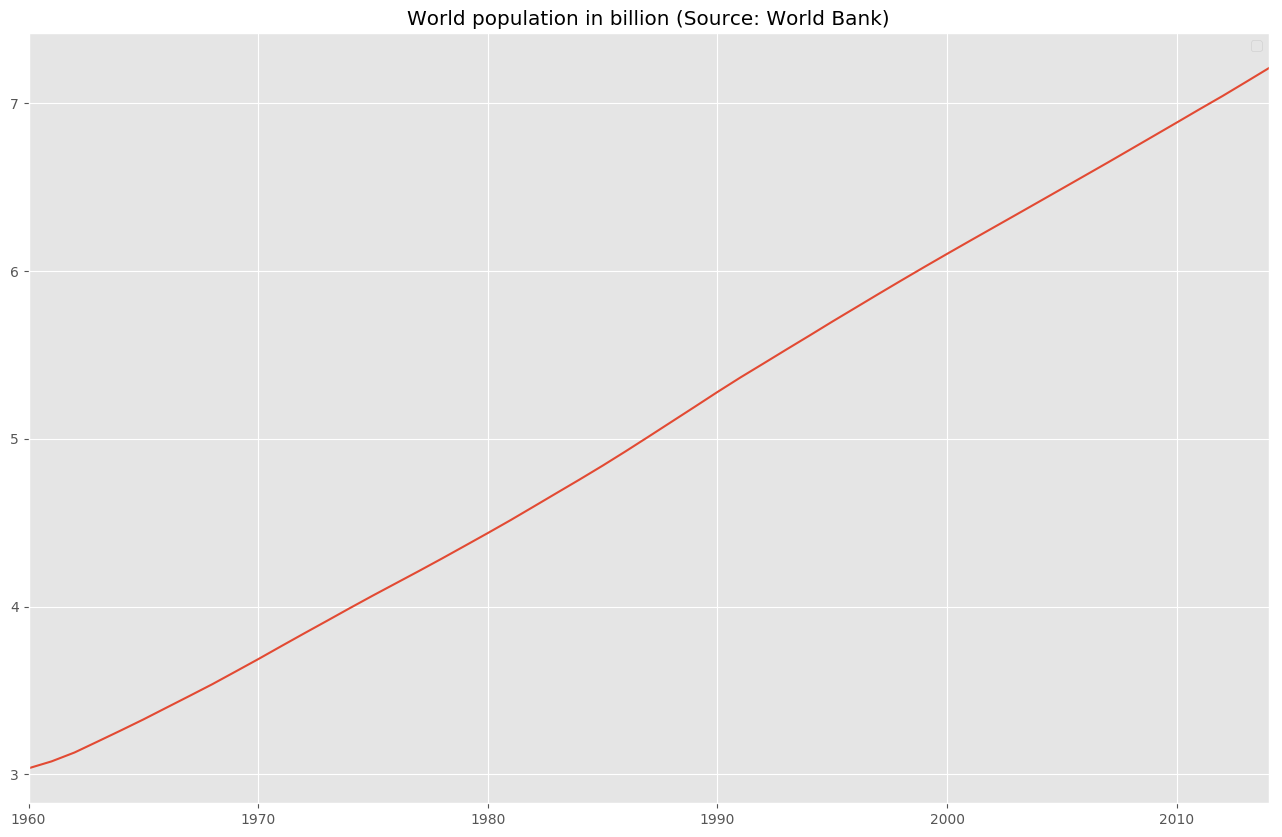

In [12]:
world_population = population[population["Country Name"] == "World"][["Year", "Value"]].set_index("Year")
world_population.index = [i.year for i in world_population.index]
world_population = world_population.Value
(world_population / 10**9).plot()
plt.legend("")
plt.title("World population in billion (Source: World Bank)");

In [13]:
ffc_t_CO2 = ffc_Gt_CO2 * 10**9

Re-creating the above plot of per-capita emissions by doing the calculation with the new dataset and plotting them together shows minor differences due to using different population data.

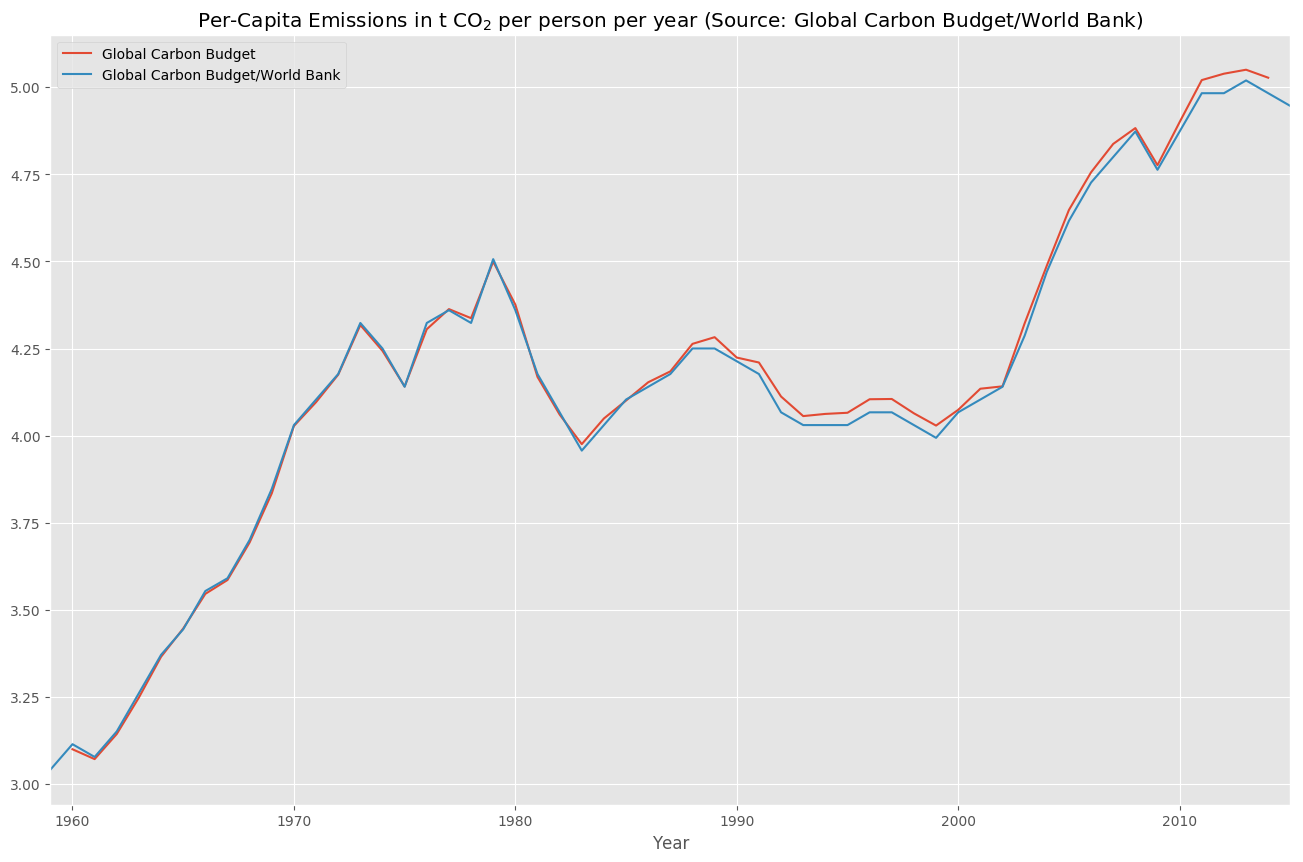

In [14]:
ffc_t_CO2.Total.loc[1960:].divide(world_population).plot()
per_capita_CO2.plot()
plt.legend(["Global Carbon Budget", "Global Carbon Budget/World Bank"],
          loc="upper left")
plt.title("Per-Capita Emissions in t CO$_2$ per person per year (Source: Global Carbon Budget/World Bank)");

Let's look at what the per-capita emissions consist of:

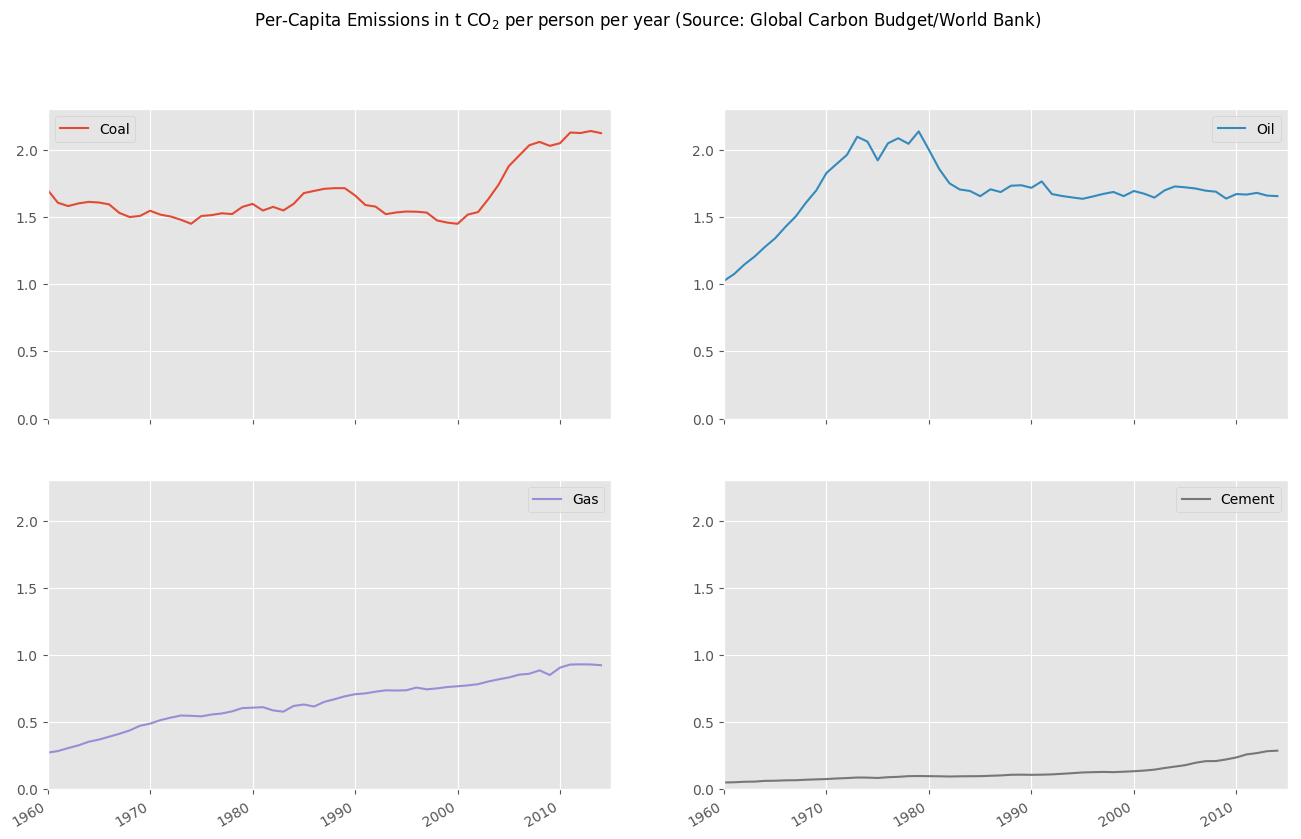

In [15]:
per_capita_categories = ffc_t_CO2[["Coal", "Oil", "Gas", "Cement"]].loc[1960:].divide(
    world_population, axis=0)

per_capita_categories.plot(subplots=True, layout=(2,2), ylim=(0, 2.3))

plt.suptitle("Per-Capita Emissions in t CO$_2$ per person per year (Source: Global Carbon Budget/World Bank)");